In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [87]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


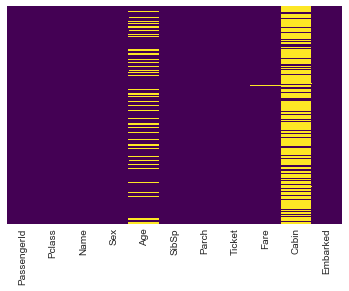

In [93]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')
test.info()


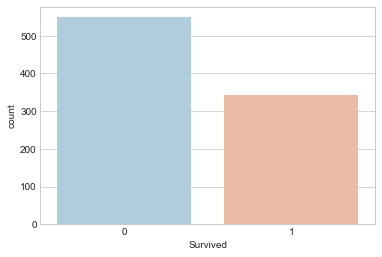

In [89]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

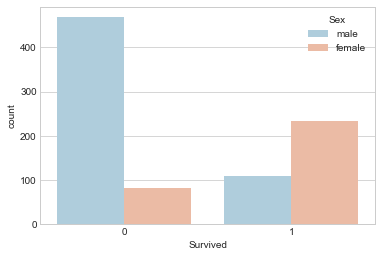

In [90]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

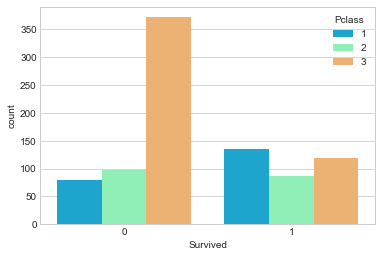

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

E:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


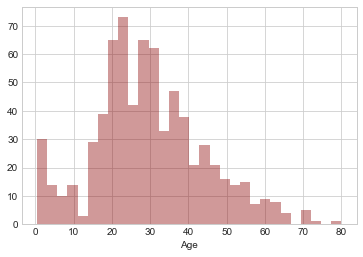

In [8]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

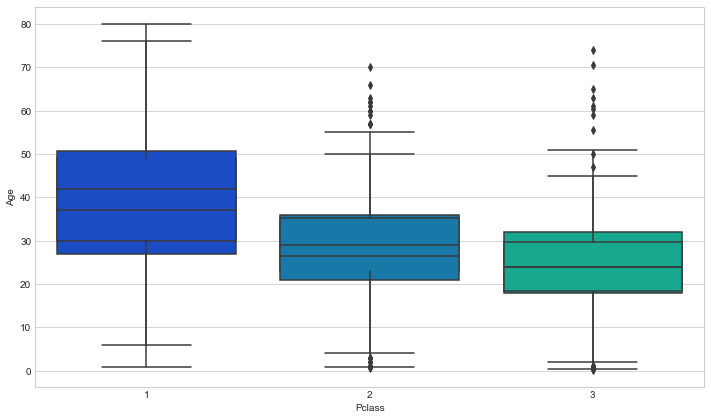

In [97]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
sns.boxplot(x='Pclass',y='Age',data=test,palette='winter')


In [100]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [105]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

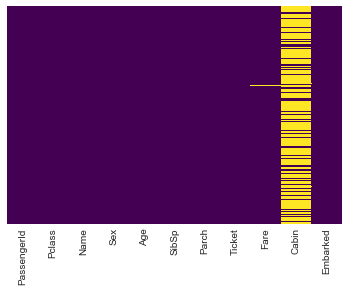

In [106]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [107]:
train.drop('Cabin',axis=1,inplace=True)
test.drop('Cabin',axis=1,inplace=True)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,34.5,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,47.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,62.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,22.0,0,0,373450,8.0500,S


In [109]:
train.dropna(inplace=True)

In [110]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [117]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [124]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1.0,0.0,3.0,34.5,1.0,0.0,7.2500,1.0,1.0,0.0,1,0,1
1,2.0,1.0,1.0,47.0,1.0,0.0,71.2833,0.0,0.0,1.0,0,0,0
2,3.0,1.0,3.0,62.0,0.0,0.0,7.9250,1.0,1.0,0.0,0,0,1
3,4.0,1.0,1.0,27.0,1.0,0.0,53.1000,1.0,0.0,1.0,0,0,1
4,5.0,0.0,3.0,22.0,0.0,0.0,8.0500,0.0,0.0,1.0,1,0,1


In [125]:
test = pd.concat([train,sex,embark],axis=1)

In [126]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,34.5,1.0,0.0,A/5 21171,7.2500,S,1.0,1.0,0.0,1,0,1
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,47.0,1.0,0.0,PC 17599,71.2833,C,0.0,0.0,1.0,0,0,0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,62.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0,1.0,0.0,0,0,1
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1.0,0.0,113803,53.1000,S,1.0,0.0,1.0,0,0,1
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,22.0,0.0,0.0,373450,8.0500,S,0.0,0.0,1.0,1,0,1


In [24]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.20, 
                                                    random_state=101)


In [129]:
X = test.drop('Survived',axis=1)
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S
0,1.0,3.0,"Braund, Mr. Owen Harris",male,34.5,1.0,0.0,A/5 21171,7.2500,S,1.0,1.0,0.0,1,0,1
1,2.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,47.0,1.0,0.0,PC 17599,71.2833,C,0.0,0.0,1.0,0,0,0
2,3.0,3.0,"Heikkinen, Miss. Laina",female,62.0,0.0,0.0,STON/O2. 3101282,7.9250,S,1.0,1.0,0.0,0,0,1
3,4.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1.0,0.0,113803,53.1000,S,1.0,0.0,1.0,0,0,1
4,5.0,3.0,"Allen, Mr. William Henry",male,22.0,0.0,0.0,373450,8.0500,S,0.0,0.0,1.0,1,0,1


In [80]:
from sklearn.svm import SVC

In [81]:
model = SVC(kernel='linear', C=10, gamma=1)

In [82]:
model.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [83]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
print(confusion_matrix(y_test,predictions))

[[102   5]
 [ 24  47]]


In [85]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.95      0.88       107
          1       0.90      0.66      0.76        71

avg / total       0.85      0.84      0.83       178

